In [ ]:
import pandas as pd
import numpy as np
# !pip install yfinance
import yfinance as yf 

In [10]:
# sp500=yf.Ticker("^GSPC")
# sp500= sp500.history(period="max")

In [21]:
msci_em= yf.Ticker("EEM")
msci_em= msci_em.history(period="max")


In [22]:
msci_em

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-04-14,7.856561,7.911393,7.856561,7.911393,93600,0.0,0.0
2003-04-15,7.959955,8.028887,7.959955,8.005387,421200,0.0,0.0
2003-04-16,8.091554,8.130719,8.091554,8.097820,9000,0.0,0.0
2003-04-17,8.142468,8.158133,8.128368,8.155784,17100,0.0,0.0
2003-04-21,8.165183,8.165966,8.146385,8.152650,72900,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,0.0,0.0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,0.0,0.0
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,0.0,0.0


In [23]:
msci_em.index

DatetimeIndex(['2003-04-14', '2003-04-15', '2003-04-16', '2003-04-17',
               '2003-04-21', '2003-04-22', '2003-04-23', '2003-04-24',
               '2003-04-25', '2003-04-28',
               ...
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10',
               '2022-08-11', '2022-08-12'],
              dtype='datetime64[ns]', name='Date', length=4868, freq=None)

<AxesSubplot:xlabel='Date'>

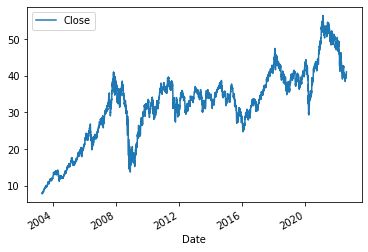

In [25]:
msci_em.plot.line(y="Close", use_index=True)

In [27]:
lean_df = msci_em.drop(["Dividends", "Stock Splits"], axis = 1)
lean_df

,Open,High,Low,Close,Volume
Date,,,,,
2003-04-14,7.856561,7.911393,7.856561,7.911393,93600
2003-04-15,7.959955,8.028887,7.959955,8.005387,421200
2003-04-16,8.091554,8.130719,8.091554,8.097820,9000
2003-04-17,8.142468,8.158133,8.128368,8.155784,17100
2003-04-21,8.165183,8.165966,8.146385,8.152650,72900
...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200


In [28]:
lean_df['Tomorrow'] = lean_df["Close"].shift(-1)

In [29]:
lean_df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2003-04-14,7.856561,7.911393,7.856561,7.911393,93600,8.005387
2003-04-15,7.959955,8.028887,7.959955,8.005387,421200,8.097820
2003-04-16,8.091554,8.130719,8.091554,8.097820,9000,8.155784
2003-04-17,8.142468,8.158133,8.128368,8.155784,17100,8.152650
2003-04-21,8.165183,8.165966,8.146385,8.152650,72900,8.180066
...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999


In [31]:
lean_df['Target']= (lean_df['Tomorrow'] > lean_df['Close']).astype(int)
lean_df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2003-04-14,7.856561,7.911393,7.856561,7.911393,93600,8.005387,1
2003-04-15,7.959955,8.028887,7.959955,8.005387,421200,8.097820,1
2003-04-16,8.091554,8.130719,8.091554,8.097820,9000,8.155784,1
2003-04-17,8.142468,8.158133,8.128368,8.155784,17100,8.152650,0
2003-04-21,8.165183,8.165966,8.146385,8.152650,72900,8.180066,1
...,...,...,...,...,...,...,...
2022-08-08,40.130001,40.349998,40.020000,40.110001,39087300,39.959999,0
2022-08-09,40.150002,40.209999,39.880001,39.959999,22828600,40.459999,1
2022-08-10,40.230000,40.500000,40.080002,40.459999,27028200,40.619999,1
